In [42]:
from dados_de_mercado import Dados_de_mercado
import pandas as pd
from datetime import datetime, timedelta
import time
import os
import matplotlib.pyplot as plt

from fintz import Fintz

In [81]:
os.chdir("C:\\Users\\eduar\\dev\\github\\dados_fundamentalistas_fintz\\atualizado1q24")

In [82]:
precos = pd.read_parquet('historico_acoes.parquet')
ebit = pd.read_parquet('EBIT.parquet')
receita_liquida = pd.read_parquet('ReceitaLiquida.parquet')
custos = pd.read_parquet('Custos.parquet')
lucro_liquido = pd.read_parquet('LucroLiquido.parquet')
ativo_circulante = pd.read_parquet('AtivoCirculante.parquet')
ativo_nao_circulante = pd.read_parquet('AtivoNaoCirculante.parquet')
ativo_total = pd.read_parquet('AtivoTotal.parquet')
caixa = pd.read_parquet('CaixaEquivalentes.parquet')
divida_bruta = pd.read_parquet('DividaBruta.parquet')
divida_liquida = pd.read_parquet('DividaLiquida.parquet')
ebitda = pd.read_parquet('EBITDA.parquet')
passivo_circulante = pd.read_parquet('PassivoCirculante.parquet')
passivo_nao_circulante = pd.read_parquet('PassivoNaoCirculante.parquet')
passivo_total = pd.read_parquet('PassivoTotal.parquet')
patrimonio_liquido = pd.read_parquet('PatrimonioLiquido.parquet')
roe = pd.read_parquet('ROE.parquet')
p_l = pd.read_parquet('P_L.parquet')
p_vp = pd.read_parquet('P_VP.parquet')
dy = pd.read_parquet('DividendYield.parquet')
roic = pd.read_parquet('ROIC.parquet')
vpa = pd.read_parquet('VPA.parquet')
lpa = pd.read_parquet('LPA.parquet')
divida_bruta_patrimonio_liquido = pd.read_parquet('DividaBruta_PatrimonioLiquido.parquet')
divida_liquida_patrimonio_liquido = pd.read_parquet('DividaLiquida_PatrimonioLiquido.parquet')
divida_liquida_ebit = pd.read_parquet('DividaLiquida_EBIT.parquet')
divida_liquida_ebitda = pd.read_parquet('DividaLiquida_EBITDA.parquet')
valor_de_mercado = pd.read_parquet('ValorDeMercado.parquet')
ev = pd.read_parquet('EV.parquet')

In [83]:
os.chdir("C:\\Users\\eduar\\dev\\github\\radar_fundamentalista")

In [17]:
tickers = ['RRRP3', 'ABEV3','AZUL4','B3SA3','BBSE3','BBDC3','BBDC4','BBAS3','BRKM5','BRFS3','BPAC11','CMIG4','CIEL3','COGN3',
 'CPLE6','CSAN3','CMIN3','CVCB3','CYRE3','ELET3','EMBR3','EQTL3','GGBR4','GOAU4','NTCO3','HAPV3','IRBR3','ITSA4','ITUB4','JBSS3',
 'KLBN11','RENT3','LREN3','LWSA3','MGLU3','MRFG3','BEEF3','MRVE3','PCAR3','PETR4','PRIO3','PETZ3','SBSP3','SANB11','CSNA3','SLCE3',
 'SUZB3','TAEE11','VIVT3','TIMS3','UGPA3','USIM5','VALE3','WEGE3','YDUQ3']

In [21]:
# Tickers que estão no radar e não estão entre as principais ações da bolsa:
tickers_radar = ['CMIG3','TAEE3','TAEE4','CPLE3','CSMG3','SAPR11','SAPR3','SAPR4','BRSR3','BRSR5','BRSR6','ITSA3','SANB3','SANB4','ITUB3',
'PSSA3','WIZC3','ENAT3']

In [22]:
for ticker in tickers_radar:
    tickers.append(ticker)

In [127]:
ticker = 'PETR4'

In [128]:
anos = list(range(14,25,1))
anos

[14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

In [129]:
# evolucao de caixa
dados_caixa = caixa[caixa['ticker']==ticker]

Maior caixa: 
Ano: 2016 - 99870000000.0
Menor caixa: 
Ano: 2023 - 23650000000.0
Último caixa: 
Ano: 2024 - 60642000000.0
Diferença 10 anos: 1.5410959687387404 
Diferença 5 anos: 0.8147411696739262 
Maior diferença: 76220000000.0


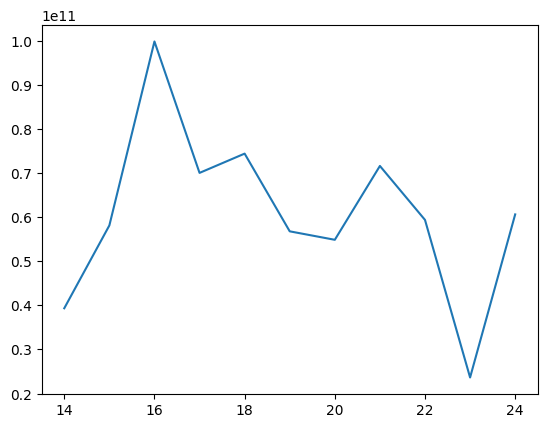

In [130]:
dados_caixa_list = []
for ano in anos:
    dado = dados_caixa[dados_caixa['data']==f'20{ano}-01-01']['valor'].values[0]
    dados_caixa_list.append(dado)

dado_max = max(dados_caixa_list)
indice_dado_max = dados_caixa_list.index(max(dados_caixa_list))
ano_max = anos[indice_dado_max]
dado_min = min(dados_caixa_list)
indice_dado_min = dados_caixa_list.index(min(dados_caixa_list))
ano_min = anos[indice_dado_min]
diferenca_dez_anos = dados_caixa_list[-1]/dados_caixa_list[0]
diferenca_cinco_anos = dados_caixa_list[-1]/dados_caixa_list[4]
amplitude_maxima = dado_max - dado_min

print(f'Maior caixa: \nAno: 20{ano_max} - {dado_max}')
print(f'Menor caixa: \nAno: 20{ano_min} - {dado_min}')
print(f'Último caixa: \nAno: 2024 - {dados_caixa_list[-1]}')
print(f'Diferença 10 anos: {diferenca_dez_anos} \nDiferença 5 anos: {diferenca_cinco_anos} \nMaior diferença: {amplitude_maxima}')

plt.plot(anos, dados_caixa_list)
plt.show()

In [131]:
# evolução divida longo prazo
dados_divida_longa = passivo_nao_circulante[passivo_nao_circulante['ticker']==ticker]

Maior divida: 
Ano: 2021 - 574363000000.0
Menor divida: 
Ano: 2014 - 345370445000.0
Último divida: 
Ano: 2024 - 483435000000.0
Diferença 10 anos: 1.3997578744759125 
Diferença 5 anos: 1.0327534751966982 
Maior diferença: 228992555000.0


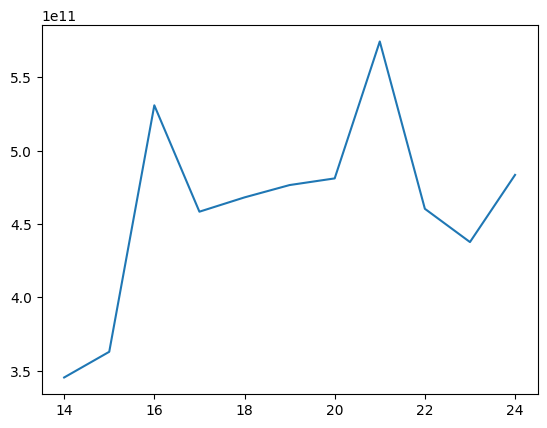

In [132]:
dados_divida_longa_list = []
for ano in anos:
    dado = dados_divida_longa[dados_divida_longa['data']==f'20{ano}-01-01']['valor'].values[0]
    dados_divida_longa_list.append(dado)

dado_max = max(dados_divida_longa_list)
indice_dado_max = dados_divida_longa_list.index(max(dados_divida_longa_list))
ano_max = anos[indice_dado_max]
dado_min = min(dados_divida_longa_list)
indice_dado_min = dados_divida_longa_list.index(min(dados_divida_longa_list))
ano_min = anos[indice_dado_min]
diferenca_dez_anos = dados_divida_longa_list[-1]/dados_divida_longa_list[0]
diferenca_cinco_anos = dados_divida_longa_list[-1]/dados_divida_longa_list[4]
amplitude_maxima = dado_max - dado_min

print(f'Maior divida: \nAno: 20{ano_max} - {dado_max}')
print(f'Menor divida: \nAno: 20{ano_min} - {dado_min}')
print(f'Último divida: \nAno: 2024 - {dados_divida_longa_list[-1]}')
print(f'Diferença 10 anos: {diferenca_dez_anos} \nDiferença 5 anos: {diferenca_cinco_anos} \nMaior diferença: {amplitude_maxima}')

plt.plot(anos, dados_divida_longa_list)
plt.show()

In [133]:
# Dados número de ações:
dados_patrimonio_liquido = patrimonio_liquido[patrimonio_liquido['ticker']==ticker]

In [134]:
dados_vpa = vpa[vpa['ticker']==ticker]

In [135]:
numero_acoes_list = []
for ano in anos:
    dado_pl = dados_patrimonio_liquido[dados_patrimonio_liquido['data']==f'20{ano}-01-01']['valor'].values[0]
    dado_vpa = dados_vpa[dados_vpa['data']==f'20{ano}-01-01']['valor'].values[0]
    num_acoes = dado_pl/dado_vpa
    num_acoes = num_acoes/1000000
    num_acoes = round(num_acoes,-1)
    print(ano, '-', num_acoes, 'milhões de ações')

14 - 13040.0 milhões de ações
15 - 13040.0 milhões de ações
16 - 13040.0 milhões de ações
17 - 13040.0 milhões de ações
18 - 13040.0 milhões de ações
19 - 13040.0 milhões de ações
20 - 13040.0 milhões de ações
21 - 13040.0 milhões de ações
22 - 13040.0 milhões de ações
23 - 13040.0 milhões de ações
24 - 13040.0 milhões de ações


In [136]:
# Dados dívida bruta/patrimonio liqdo
dados_divida_pl = divida_bruta_patrimonio_liquido[divida_bruta_patrimonio_liquido['ticker']==ticker]

Maior divida: 
Ano: 2021 - 1.793126725009087
Menor divida: 
Ano: 2014 - 0.731169617989057
Último divida: 
Ano: 2024 - 0.7882809878964618
Diferença 10 anos: 1.0781096048061718 
Diferença 5 anos: 0.5801567522436206 
Maior diferença: 1.06195710702003


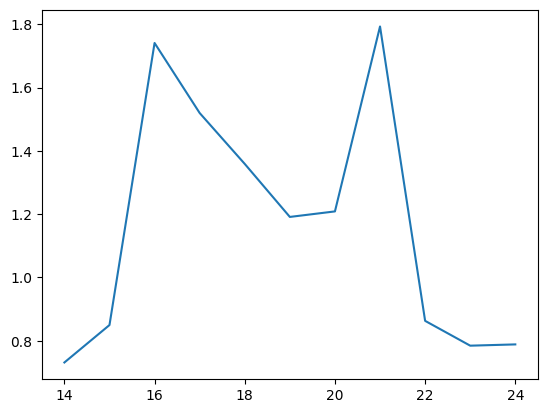

In [137]:
dados_divida_pl_list = []
for ano in anos:
    dado = dados_divida_pl[dados_divida_pl['data']==f'20{ano}-01-01']['valor'].values[0]
    dados_divida_pl_list.append(dado)

dado_max = max(dados_divida_pl_list)
indice_dado_max = dados_divida_pl_list.index(max(dados_divida_pl_list))
ano_max = anos[indice_dado_max]
dado_min = min(dados_divida_pl_list)
indice_dado_min = dados_divida_pl_list.index(min(dados_divida_pl_list))
ano_min = anos[indice_dado_min]
diferenca_dez_anos = dados_divida_pl_list[-1]/dados_divida_pl_list[0]
diferenca_cinco_anos = dados_divida_pl_list[-1]/dados_divida_pl_list[4]
amplitude_maxima = dado_max - dado_min

print(f'Maior divida: \nAno: 20{ano_max} - {dado_max}')
print(f'Menor divida: \nAno: 20{ano_min} - {dado_min}')
print(f'Último divida: \nAno: 2024 - {dados_divida_pl_list[-1]}')
print(f'Diferença 10 anos: {diferenca_dez_anos} \nDiferença 5 anos: {diferenca_cinco_anos} \nMaior diferença: {amplitude_maxima}')

plt.plot(anos, dados_divida_pl_list)
plt.show()

In [138]:
# Dados Lucro liquido e custos
dados_lucro_liquido = lucro_liquido[lucro_liquido['ticker']==ticker]
dados_custos = custos[custos['ticker']==ticker]

Maior lucro: 
Ano: 2023 - 46236000000.0
Menor lucro: 
Ano: 2017 - -16323000000.0
Último lucro: 
Ano: 2024 - 26760000000.0
Diferença 10 anos: 7.554710246089887 
Diferença 5 anos: 41.16923076923077 
Maior diferença: 62559000000.0


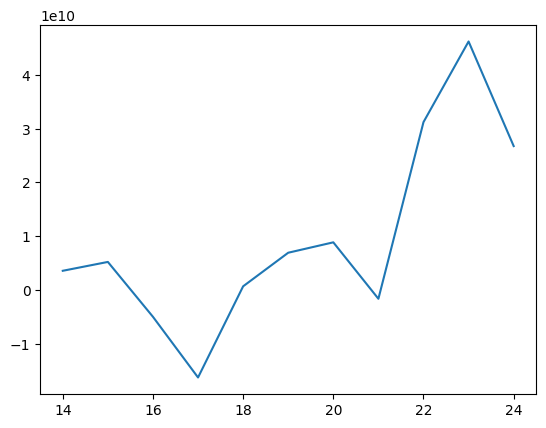

In [139]:
dados_lucro_list = []

for ano in anos:
    dado = dados_lucro_liquido[dados_lucro_liquido['data']==f'20{ano}-01-01']['valor'].values[0]
    dados_lucro_list.append(dado)

dado_max = max(dados_lucro_list)
indice_dado_max = dados_lucro_list.index(max(dados_lucro_list))
ano_max = anos[indice_dado_max]
dado_min = min(dados_lucro_list)
indice_dado_min = dados_lucro_list.index(min(dados_lucro_list))
ano_min = anos[indice_dado_min]
diferenca_dez_anos = dados_lucro_list[-1]/dados_lucro_list[0]
diferenca_cinco_anos = dados_lucro_list[-1]/dados_lucro_list[4]
amplitude_maxima = dado_max - dado_min

print(f'Maior lucro: \nAno: 20{ano_max} - {dado_max}')
print(f'Menor lucro: \nAno: 20{ano_min} - {dado_min}')
print(f'Último lucro: \nAno: 2024 - {dados_lucro_list[-1]}')
print(f'Diferença 10 anos: {diferenca_dez_anos} \nDiferença 5 anos: {diferenca_cinco_anos} \nMaior diferença: {amplitude_maxima}')

plt.plot(anos, dados_lucro_list)
plt.show()

Maior custo: 
Ano: 2021 - -36961000000.0
Menor custo: 
Ano: 2023 - -83240000000.0
Último custo: 
Ano: 2024 - -58513000000.0
Diferença 10 anos: 0.9574301203068469 
Diferença 5 anos: 1.1567263022635168 
Maior diferença: 46279000000.0


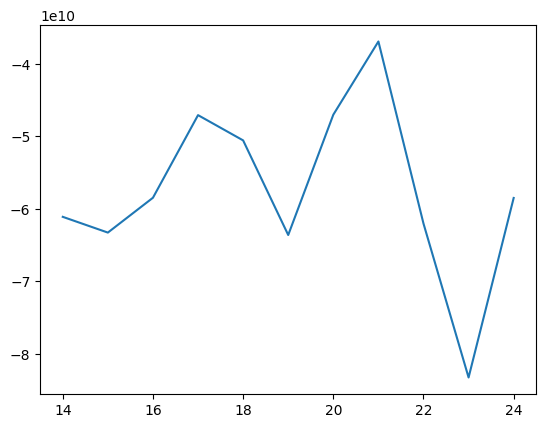

In [140]:
dados_custos_list = []

for ano in anos:
    dado = dados_custos[dados_custos['data']==f'20{ano}-01-01']['valor'].values[0]
    dados_custos_list.append(dado)

dado_max = max(dados_custos_list)
indice_dado_max = dados_custos_list.index(max(dados_custos_list))
ano_max = anos[indice_dado_max]
dado_min = min(dados_custos_list)
indice_dado_min = dados_custos_list.index(min(dados_custos_list))
ano_min = anos[indice_dado_min]
diferenca_dez_anos = dados_custos_list[-1]/dados_custos_list[0]
diferenca_cinco_anos = dados_custos_list[-1]/dados_custos_list[4]
amplitude_maxima = dado_max - dado_min

print(f'Maior custo: \nAno: 20{ano_max} - {dado_max}')
print(f'Menor custo: \nAno: 20{ano_min} - {dado_min}')
print(f'Último custo: \nAno: 2024 - {dados_custos_list[-1]}')
print(f'Diferença 10 anos: {diferenca_dez_anos} \nDiferença 5 anos: {diferenca_cinco_anos} \nMaior diferença: {amplitude_maxima}')

plt.plot(anos, dados_custos_list)
plt.show()

In [141]:
# Dados dividendo
dados_preco = precos[precos['ticker']==ticker]
dados_dy = dy[dy['ticker']==ticker]
dados_lpa = lpa[lpa['ticker']==ticker]

In [147]:
dividendos_list = []
payout_list = []
for ano in anos:

    data_inicio_ano = pd.to_datetime(f'20{ano}-01-01')
    primeira_data_apos_inicio_ano = dados_preco.loc[dados_preco['data'] > data_inicio_ano, 'data'].min()
    dado_preco = dados_preco.loc[dados_preco['data'] == primeira_data_apos_inicio_ano, 'preco_abertura'].values[0]
    dado_dy = dados_dy.loc[dados_dy['data'] == primeira_data_apos_inicio_ano, 'valor'].values[0]
    dado_lpa = dados_lpa.loc[dados_lpa['data'] == primeira_data_apos_inicio_ano, 'valor'].values[0]

    dividendos = dado_preco*dado_dy
    dividendos_list.append(dividendos)

    payout = dividendos/dado_lpa
    payout_list.append(payout)
    
    print(f'20{ano}: \nDividendo: {dividendos} - LPA: {dado_lpa} - Payout:{round(payout*100,0)}%')

2014: 
Dividendo: 0.801667791044776 - LPA: 1.9193098055064906 - Payout:42.0%
2015: 
Dividendo: 1.0647141346153848 - LPA: 1.535363916293591 - Payout:69.0%
2016: 
Dividendo: 0.0 - LPA: -1.8780333193376486 - Payout:-0.0%
2017: 
Dividendo: 0.0 - LPA: -4.1605283821982555 - Payout:-0.0%
2018: 
Dividendo: 0.0 - LPA: 0.57809818193833 - Payout:0.0%
2019: 
Dividendo: 0.8435162094763093 - LPA: 1.3952243616599398 - Payout:60.0%
2020: 
Dividendo: 0.9336795420195441 - LPA: 2.613055911623116 - Payout:36.0%
2021: 
Dividendo: 0.00045685402974749226 - LPA: -3.421289452556124 - Payout:-0.0%
2022: 
Dividendo: 5.546347242351323 - LPA: 10.353331425867413 - Payout:54.0%
2023: 
Dividendo: 17.22018959938918 - LPA: 13.529920007424924 - Payout:127.0%
2024: 
Dividendo: 7.25252986062467 - LPA: 10.495153683170823 - Payout:69.0%


In [143]:
# Divida liqu / pl
dados_div_liq_pl = divida_liquida_patrimonio_liquido[divida_liquida_patrimonio_liquido['ticker']==ticker]

Maior divida: 
Ano: 2021 - 1.4918937054892736
Menor divida: 
Ano: 2014 - 0.5624275982828404
Último divida: 
Ano: 2024 - 0.6149939353273632
Diferença 10 anos: 1.093463295906912 
Diferença 5 anos: 0.5825788873926406 
Maior diferença: 0.9294661072064332


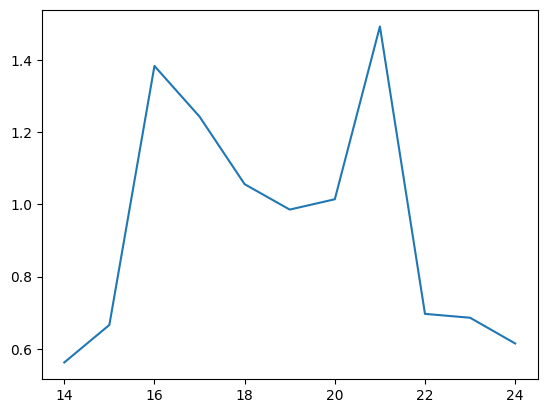

In [144]:
dados_divida_liq_pl_list = []
for ano in anos:
    dado = dados_div_liq_pl[dados_div_liq_pl['data']==f'20{ano}-01-01']['valor'].values[0]
    dados_divida_liq_pl_list.append(dado)

dado_max = max(dados_divida_liq_pl_list)
indice_dado_max = dados_divida_liq_pl_list.index(max(dados_divida_liq_pl_list))
ano_max = anos[indice_dado_max]
dado_min = min(dados_divida_liq_pl_list)
indice_dado_min = dados_divida_liq_pl_list.index(min(dados_divida_liq_pl_list))
ano_min = anos[indice_dado_min]
diferenca_dez_anos = dados_divida_liq_pl_list[-1]/dados_divida_liq_pl_list[0]
diferenca_cinco_anos = dados_divida_liq_pl_list[-1]/dados_divida_liq_pl_list[4]
amplitude_maxima = dado_max - dado_min

print(f'Maior divida: \nAno: 20{ano_max} - {dado_max}')
print(f'Menor divida: \nAno: 20{ano_min} - {dado_min}')
print(f'Último divida: \nAno: 2024 - {dados_divida_liq_pl_list[-1]}')
print(f'Diferença 10 anos: {diferenca_dez_anos} \nDiferença 5 anos: {diferenca_cinco_anos} \nMaior diferença: {amplitude_maxima}')

plt.plot(anos, dados_divida_liq_pl_list)
plt.show()

In [145]:
# Divida liqu / ebitda
dados_div_ebitda = divida_liquida_ebitda[divida_liquida_ebitda['ticker']==ticker]

Maior divida: 
Ano: 2017 - 24.500526791089705
Menor divida: 
Ano: 2023 - 0.7002744195181564
Último divida: 
Ano: 2024 - 0.8382337940082942
Diferença 10 anos: 0.2566180259077875 
Diferença 5 anos: 0.27650545235730933 
Maior diferença: 23.80025237157155


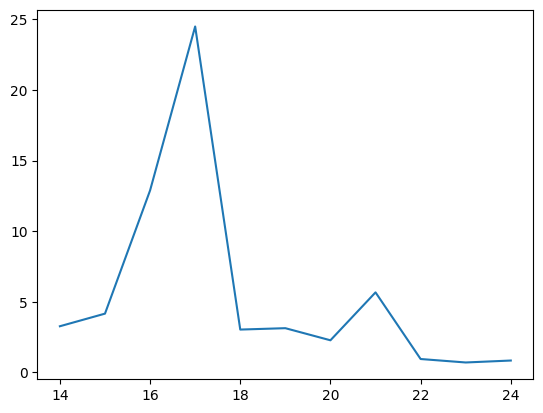

In [146]:
dados_div_ebitda_list = []
for ano in anos:
    dado = dados_div_ebitda[dados_div_ebitda['data']==f'20{ano}-01-01']['valor'].values[0]
    dados_div_ebitda_list.append(dado)

dado_max = max(dados_div_ebitda_list)
indice_dado_max = dados_div_ebitda_list.index(max(dados_div_ebitda_list))
ano_max = anos[indice_dado_max]
dado_min = min(dados_div_ebitda_list)
indice_dado_min = dados_div_ebitda_list.index(min(dados_div_ebitda_list))
ano_min = anos[indice_dado_min]
diferenca_dez_anos = dados_div_ebitda_list[-1]/dados_div_ebitda_list[0]
diferenca_cinco_anos = dados_div_ebitda_list[-1]/dados_div_ebitda_list[4]
amplitude_maxima = dado_max - dado_min

print(f'Maior divida: \nAno: 20{ano_max} - {dado_max}')
print(f'Menor divida: \nAno: 20{ano_min} - {dado_min}')
print(f'Último divida: \nAno: 2024 - {dados_div_ebitda_list[-1]}')
print(f'Diferença 10 anos: {diferenca_dez_anos} \nDiferença 5 anos: {diferenca_cinco_anos} \nMaior diferença: {amplitude_maxima}')

plt.plot(anos, dados_div_ebitda_list)
plt.show()